In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing Movies data
movies_data = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')

In [3]:
# View top 5 rows from Movies data
movies_data.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
# Cheking the size of data
movies_data.shape

(16744, 16)

In [5]:
# Data description
movies_data.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8372.500000,2003.014035,5.902751,0.212614,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,20.674321,1.347867,0.409170,0.225886,0.439835,0.180419,0.0,28.219222
min,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16744.000000,2020.000000,9.300000,1.010000,1.000000,1.000000,1.000000,0.0,1256.000000


In [6]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  float64
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 2.0+ MB


### Data Cleaning

In [7]:
# Removing duplicate records

movies_data.drop_duplicates(inplace=True)

In [8]:
# Removing unneccsary columns

# Type column is only having value 0 which does not contain any valuable information for EDA process.
# Rotten Tomatoes column contains almost 70% of NULL values. So, inputing it with values may change the actual meaning of the data. Hence, the column is dropped.

movies_data.drop(columns=['ID','Type','Rotten Tomatoes'],inplace=True)

### Handling null values

In [9]:
movies_data.isnull().sum()

Title             0
Year              0
Age            9390
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Directors       726
Genres          275
Country         435
Language        599
Runtime         592
dtype: int64

Directors column has 726 null values. These records cannot be filled with other values.

C:\Users\DUSHYANT AHIRE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Mean: 5.902751499412594 Median: 6.1


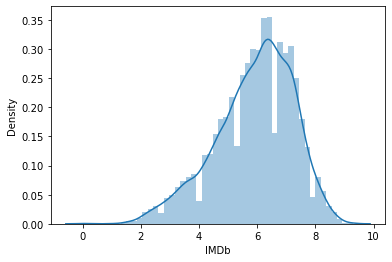

In [10]:
sns.distplot(movies_data['IMDb'])
print('Mean:',movies_data['IMDb'].mean(),'Median:',movies_data['IMDb'].median())

We can see from the above graph that there are no outliers as IMDB colummn is normally distributed with mean and median almost equal.
Hence we can fill the NA values in IMDB coulmn with median value

In [11]:
movies_data['IMDb'].fillna(movies_data['IMDb'].median(),inplace=True)

We are deleting the records where more than 8 columns are null values, which may not be useful for any kind of analysis.

In [12]:
movies_data.dropna(axis=0,thresh=8,inplace=True)

Let us convert the type of 'Age' column from object to integer to get some useful insights.

In [13]:
movies_data['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

In [14]:
movies_data['Age'].replace({'18+':18},inplace=True)
movies_data['Age'].replace({'7+':7},inplace=True)
movies_data['Age'].replace({'13+':13},inplace=True)
movies_data['Age'].replace({'all':0},inplace=True)
movies_data['Age'].replace({'16+':16},inplace=True)

In [15]:
movies_data.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13.0,8.8,1.0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18.0,8.7,1.0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13.0,8.5,1.0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7.0,8.5,1.0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,1.0,0,1,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


### Visualization

Movie count across each platform


<AxesSubplot:>

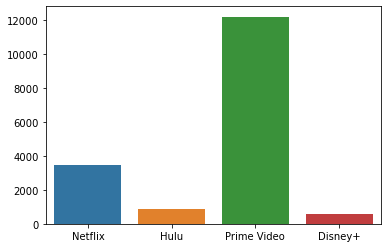

In [16]:
sns.barplot(x=['Netflix','Hulu','Prime Video','Disney+'],y=[movies_data['Netflix'].value_counts()[1],
                movies_data['Hulu'].value_counts()[1],movies_data['Prime Video'].value_counts()[1],
                movies_data['Disney+'].value_counts()[1]])

Highest number of movies in this data set are from Prime Video.
Followed by Netflix,Hulu and Disney+.

#### Movies Distribution throughout the Years

In [17]:
print('Movies released from the year %d are available on OTT platforms '%(movies_data['Year'].min()))
print('Many movies released in the year %d are available on OTT platforms '%(movies_data['Year'].median()))

Movies released from the year 1902 are available on OTT platforms 
Many movies released in the year 2012 are available on OTT platforms 


C:\Users\DUSHYANT AHIRE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


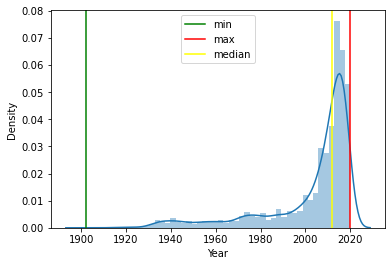

In [18]:
sns.distplot(movies_data['Year'])
plt.axvline(movies_data['Year'].min(),color='green',label='min')
plt.axvline(movies_data['Year'].max(),color='red',label='max')
plt.axvline(movies_data['Year'].median(),color='yellow',label='median')
plt.legend()

We can see that maximum movies are released between the years 2005 and 2020 in above OTT platforms.

In [19]:
print(movies_data['Year'].value_counts().head())

2017    1378
2018    1248
2016    1184
2015    1049
2014     974
Name: Year, dtype: int64


Mostly movies in the OTT platforms are found in the year 2015,2016,2017,2018. This is when the Movies watching on OTT platforms rised.

### Visualization based on Genres

Genre column contains various genres which seperated by comma. Hence we will have to separate the genres and create new column having individual genre.

In [20]:
movies_genre=movies_data.copy()
del movies_genre['Genres']
s = movies_data['Genres'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'Genres'
movies_genre = movies_genre.join(s)

movies_genre.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Country,Language,Runtime,Genres
0,Inception,2010,13.0,8.8,1.0,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",148.0,Action
0,Inception,2010,13.0,8.8,1.0,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",148.0,Adventure
0,Inception,2010,13.0,8.8,1.0,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",148.0,Sci-Fi
0,Inception,2010,13.0,8.8,1.0,0,0,0,Christopher Nolan,"United States,United Kingdom","English,Japanese,French",148.0,Thriller
1,The Matrix,1999,18.0,8.7,1.0,0,0,0,"Lana Wachowski,Lilly Wachowski",United States,English,136.0,Action


### Movie count on the basis of genre

In [21]:
lis=[]
for i in movies_Genre['Genres']:
    lis.append(i)

for k in range(0,len(lis)):
    lis[k]=str(lis[k]).strip()
    
from collections import Counter
genre_count = Counter(lis)

from wordcloud import WordCloud
wc = WordCloud(background_color='white')
wc.generate_from_frequencies(genre_count)
plt.figure(figsize=(12,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'movies_Genre' is not defined

 - These OTT Platforms have variety of genres from Comedy to news.
 - Drama,Comedy,Thriller and Action are the majority of genres across all the Platforms.
 - This shows that the OTT platforms are more interested to have these genres which typliaclly shows the choice of viewers.

### Movie count on each platform based on genres

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
movies_genre.loc[movies_genre['Prime Video']==1,'Genres'].value_counts().plot(kind='bar',ax=axes[0],color='royalblue')
movies_genre.loc[movies_genre['Disney+']==1,'Genres'].value_counts().plot(kind='bar',ax=axes[1],color='darkblue')
axes[0].set_title('Prime Video Genres')
axes[1].set_title('Disney+ Genres')
plt.show()

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
movies_Genre.loc[movies_Genre['Netflix']==1,'Genres'].value_counts().plot(kind='bar',ax=axes[0],color='crimson')
movies_Genre.loc[movies_Genre['Hulu']==1,'Genres'].value_counts().plot(kind='bar',ax=axes[1],color='limegreen')
axes[0].set_title('Netflix Genres')
axes[1].set_title('Hulu Genres')
plt.show()

Drama and Comedy seems to be top genres across all the platform.

### Average ratings of movies based on Genres across each OTT Platform


In [ ]:
x=movies_genre.loc[movies_genre['Netflix']==1].groupby('Genres')['IMDb'].mean().reset_index().sort_values(by='IMDb',ascending=False)
y=movies_genre.loc[movies_genre['Hulu']==1].groupby('Genres')['IMDb'].mean().reset_index().sort_values(by='IMDb',ascending=False)
z=movies_genre.loc[movies_genre['Prime Video']==1].groupby('Genres')['IMDb'].mean().reset_index().sort_values(by='IMDb',ascending=False)
a=movies_genre.loc[movies_genre['Disney+']==1].groupby('Genres')['IMDb'].mean().reset_index().sort_values(by='IMDb',ascending=False)

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x['Genres'],x['IMDb'],ax=axes[0])
axes[0].set_xticklabels(labels=x['Genres'],rotation=90)
axes[0].set_title('Average IMDb ratings for each Genre in Netflix platform')
sns.barplot(y['Genres'],y['IMDb'],ax=axes[1])
axes[1].set_xticklabels(labels=y['Genres'],rotation=90)
axes[1].set_title('Average IMDb ratings for each Genre in Hulu platform')
plt.show()

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.barplot(z['Genres'],z['IMDb'],ax=axes[0])
axes[0].set_xticklabels(labels=z['Genres'],rotation=90)
axes[0].set_title('Average IMDb ratings for each Genre in Prime Video platform')
sns.barplot(a['Genres'],a['IMDb'],ax=axes[1])
axes[1].set_xticklabels(labels=a['Genres'],rotation=90)
axes[1].set_title('Average IMDb ratings for each Genre in Disney+ platform')
plt.show()

We cannot see a huge difference in the average ratings for each genre across platforms which ranges between 6 and 7.5.

### Visualization based on Languages

Language column also consists of various Languages which are comma seperated. We will have to convert it to a column of individual language and storeit in another dataframe movies_language.


In [ ]:
movies_language=movies_data.copy()
t=movies_language['Language'].str.split(',').apply(pd.Series,1).stack()
t.index=t.index.droplevel(-1)
del movies_language['Language']
t.name='Language'
movies_language=movies_language.join(t)

In [ ]:
movies_language.head()

### Top 20 languages across all the platforms

In [ ]:
top_20=movies_language['Language'].value_counts().head(20).reset_index()
top_20

In [ ]:
sns.barplot(top_20['index'],top_20['Language'])
plt.xticks(rotation=90)
plt.xlabel('Languages')
plt.ylabel('movies count')
plt.title('Movie count of top 20 languages')
plt.show()

 - English language is way at top amongst other languages
 - Indian regional languages like Hindi,Tamil,telugu,Punjabi is among the top 20 which shows that all the OTT platforms has a good reach and viewership in India.
 - A wide range of European language can be seen in the top 20 which again shows the popularity among the European nations.

### Average IMDb ratings for the top 20 languages

In [ ]:
timdb=pd.pivot_table(movies_language,index=['Language'],values='IMDb',aggfunc='median')

In [ ]:
timdb.loc[['English','Spanish','French','Hindi','German','Italian','Mandarin','Japanese','Russian','Arabic','Korean',
          'Cantonese','Tamil','Telugu','Portuguese','Turkish','Hebrew','Swedish','Filipino','Punjabi']].sort_values('IMDb',ascending=False).plot(kind='bar',color='brown')
plt.show()

We can see that even n the case of languages there is much difference in IMDb ratings which is between 6-7.

### Top 5 languages based on movie count across the OTT Platforms

In [ ]:
top_5_netflix=movies_language.loc[movies_language['Netflix']==1,'Language'].value_counts().head(5).reset_index()
top_5_prime=movies_language.loc[movies_language['Prime Video']==1,'Language'].value_counts().head(5).reset_index()
top_5_hulu=movies_language.loc[movies_language['Hulu']==1,'Language'].value_counts().head(5).reset_index()
top_5_disney=movies_language.loc[movies_language['Disney+']==1,'Language'].value_counts().head(5).reset_index()

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,5))
sns.barplot(top_5_netflix.loc[1:,'index'],top_5_netflix.loc[1:,'Language'],ax=axes[0,0])
sns.barplot(top_5_prime.loc[1:,'index'],top_5_prime.loc[1:,'Language'],ax=axes[0,1])
sns.barplot(top_5_hulu.loc[1:,'index'],top_5_hulu.loc[1:,'Language'],ax=axes[1,0])
sns.barplot(top_5_disney.loc[1:,'index'],top_5_disney.loc[1:,'Language'],ax=axes[1,1])
axes[0,0].set_title('Netflix - top 5 languages based on movie count')
axes[0,1].set_title('Prime Video - top 5 languages based on movie count')
axes[1,0].set_title('Hulu - top 5 languages based on movie count')
axes[1,1].set_title('Disney+ - top 5 languages based on movie count')
fig.tight_layout(pad=3.0)
plt.show()

- We can see from above graphs the top 5 languages(other than English) having the highest movie count in different OTT platforms.
- As seen earlier all OTT Platforms are having higher number of English language movies.
- If you want to watch hindi movies you can go with Netflix and Prime Video with more than 400 movies.
- Spanish language movies are equally spread and having more count across all the OTT platforms.
- German movies can be viewed in netflix with more than 100 movies.

### Analysis based on viewers Age

In [ ]:
sns.countplot(movies_data['Age'])
plt.show()

- 0 indicates no restriction in the age group in the movies dataset
- It can be seen that the shows in the OTT platforms are targeted for age group of 18+.
- Followed by age group of 7 and 13 which may include movies of kids genre.

### Analysis based on Movie Directors

Directors column also consists of various Director names comma seperated. We have to convert it to a column of individual directors and store it in new dataframe movie_director.

In [ ]:
movie_director=movies_Genre.copy()
s=movie_director['Directors'].str.split(',').apply(pd.Series).stack()
del movie_director['Directors']
s.index=s.index.droplevel(-1)
s.name='director'
movie_director=movie_director.join(s)

In [ ]:
movie_director.drop_duplicates(inplace=True)

In [ ]:
movie_director.head()

### Top 10 movie directors based on movie count

In [ ]:
movie_director['director'].value_counts().head(10)

In [ ]:
movie_director_10=movies_data.copy()
s=movie_director_10['Directors'].str.split(',').apply(pd.Series).stack()
del movie_director_10['Directors']
s.index=s.index.droplevel(-1)
s.name='director'
movie_director_10=movie_director_10.join(s)

In [ ]:
movie_director_10['director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Directors based on movie count across all OTT platforms')
plt.show()

- A variety of about 35 movies directed by Jay Chapman can be viewed across all OTT platform.
- Followed by Joseph kane,Cheh Chang who directed about 20 movies.

### Genres directed by top 10 directors

In [ ]:
s=pd.crosstab(movie_director['Genres'],movie_director['director']).loc[:,['Joseph Kane','Sam Newfield','Jim Wynorski','Cheh Chang',
                                                     'Mark Atkins','William Beaudine','Fred Olen Ray',
                                                     'Paul Hoen','Robert Stevenson','Richard Rich']]

In [ ]:
s.plot(kind='bar',stacked=True,figsize=(20,10))
plt.title('Various Genres directed by top 10 directors',fontdict={'fontsize':30})
plt.show()

Based on the above visualization we can infer that most of the action,comedy,music and western genre movies are directed by Joseph Kane.
Also, a wide range of action and drama genre movies are directed by Cheh Chang.
If you want to go with thriller movies, then you'll have a wide availability of movies directed by Fred Olen Ray and Mark Atkins.
William Beaudine has directed movies in almost all the above mentioned genres.

### Conclusion

Most of the OTT paltforms have high English Language content and higher viewership is aged above 18 years. Where Drama and Comedy genre tops the chart.   